In [26]:
import numpy as np
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tensorflow import keras 
import glob as gb
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU

In [27]:
IMG_SIZE = (299, 299) # resolution
directory = "/Users/shabarisrim/Documents/data"
BATCH_SIZE = 128
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             labels='inferred',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.1,
                                             subset='training',
                                             color_mode='rgb',
                                             seed=42)


Found 4188 files belonging to 4 classes.
Using 3770 files for training.


In [28]:
dir = "/Users/shabarisrim/Documents/data"

In [29]:
validation_dataset = image_dataset_from_directory(dir,
                                             shuffle=True,
                                             labels='inferred',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.1,
                                             subset='validation',
                                             color_mode='rgb',
                                             seed=42)

Found 4188 files belonging to 4 classes.
Using 418 files for validation.


In [30]:
class_names = train_dataset.class_names
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [31]:
sns.set_theme(style="whitegrid")
Data_imbalance = []
for folder in os.listdir(directory):
    files = gb.glob(pathname=str(directory + "/" + folder +"/*.*"))
    Data_imbalance.append(len(files))

In [32]:
plt.figure(figsize=(13,7))
sns.barplot(x=['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy'], y=Data_imbalance, palette="rocket")
plt.show()

KeyError: 'Blight'

<Figure size 1300x700 with 0 Axes>

In [33]:
total = 0 
for i in range(len(Data_imbalance)):
    total += Data_imbalance[i] 

weight_for_0 = (1 / Data_imbalance[0]) * (total / 4.0) if Data_imbalance[0] != 0 else 0
weight_for_1 = (1 / Data_imbalance[1]) * (total / 4.0) if Data_imbalance[1] != 0 else 0
weight_for_2 = (1 / Data_imbalance[2]) * (total / 4.0) if Data_imbalance[2] != 0 else 0
weight_for_3 = (1 / Data_imbalance[3]) * (total / 4.0) if Data_imbalance[3] != 0 else 0

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))
print('Weight for class 3: {:.2f}'.format(weight_for_3))  


Weight for class 0: 0.00
Weight for class 1: 0.90
Weight for class 2: 1.82
Weight for class 3: 0.91


In [9]:
total = 0 
for i in range(0,len(Data_imbalance)) :
    total +=Data_imbalance[i] 
    
weight_for_0 = (1 / Data_imbalance[1]) * (total / 4.0)
weight_for_1 = (1 / Data_imbalance[2]) * (total / 4.0)
weight_for_2 = (1 / Data_imbalance[3]) * (total / 4.0)
weight_for_3 = (1 / Data_imbalance[4]) * (total / 4.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))
print('Weight for class 3: {:.2f}'.format(weight_for_3))  


Weight for class 0: 0.90
Weight for class 1: 1.82
Weight for class 2: 0.91
Weight for class 3: 0.80


In [34]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])

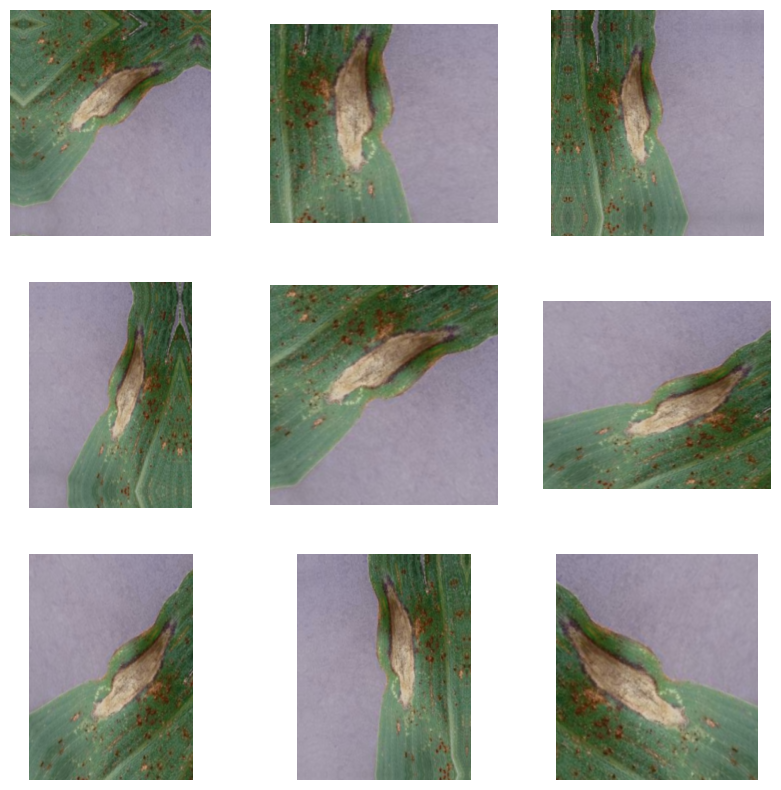

In [35]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

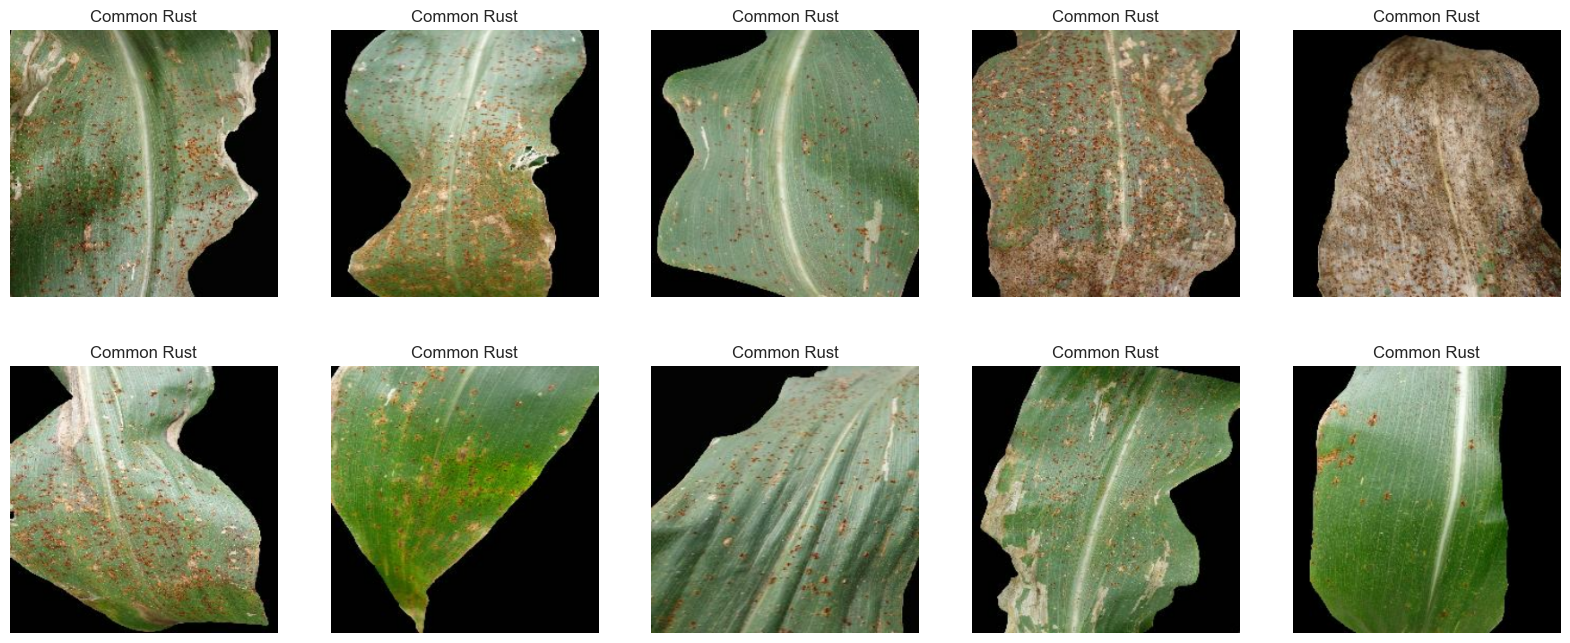

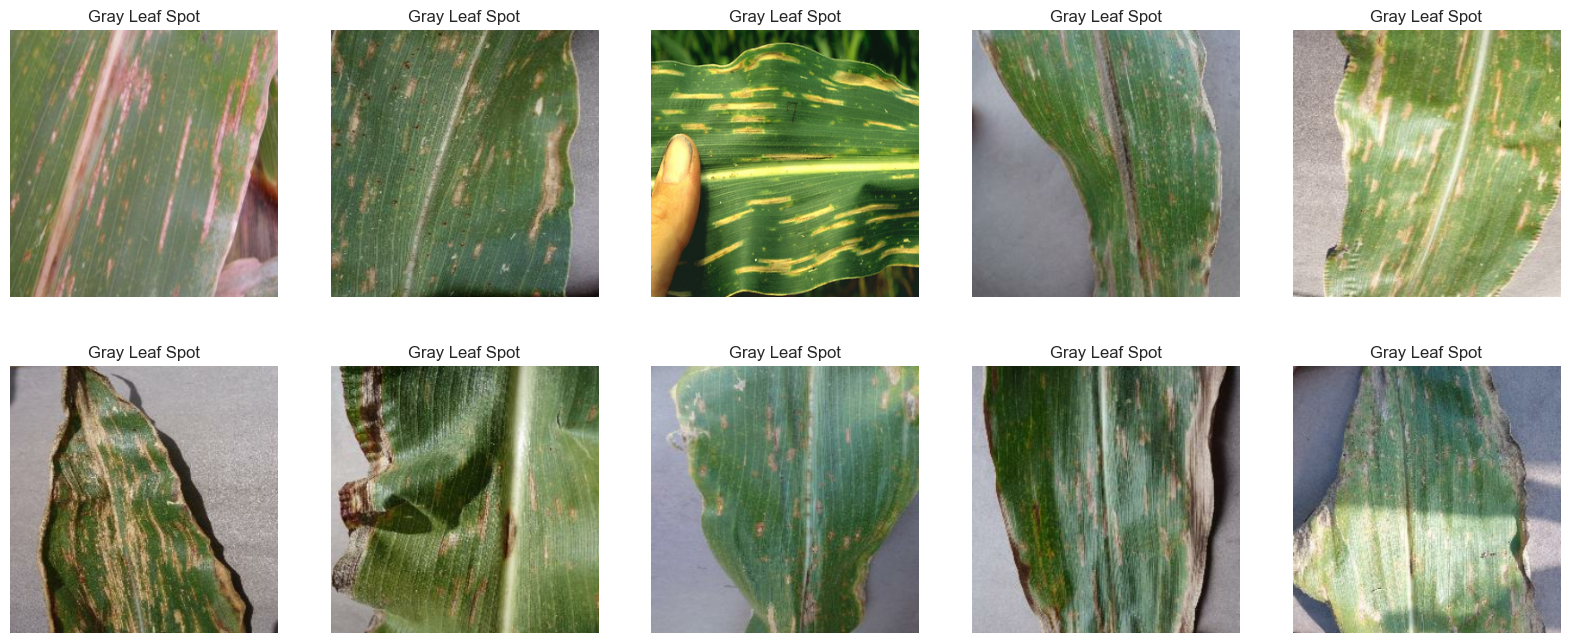

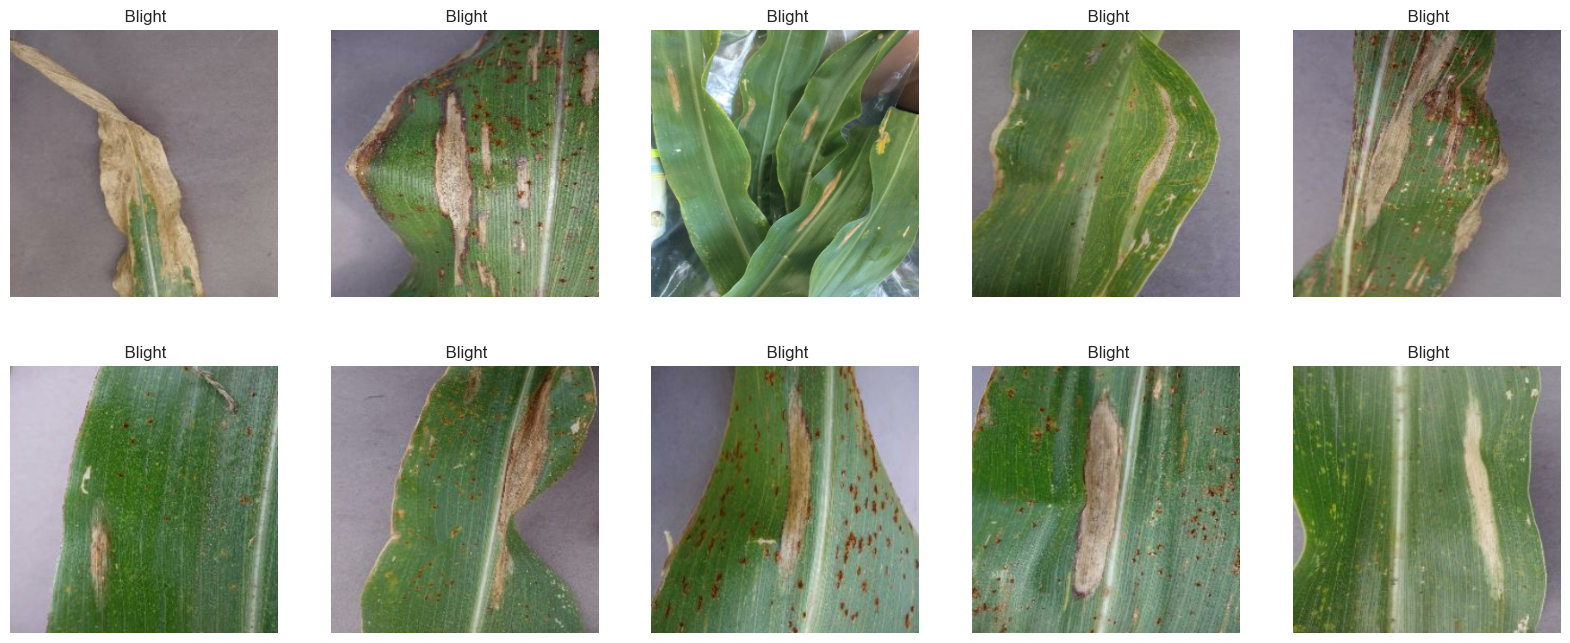

In [36]:
plt.figure(figsize=(20,8))
Common_Rust = []
Gray_Leaf_Spot = []
Blight =[]
for images , labels in train_dataset.take(1):
    for i in range(100):
        if class_names[labels[i]] == "Common_Rust":
            Common_Rust.append(images[i].numpy().astype("uint8"))
        if  class_names[labels[i]] == "Gray_Leaf_Spot":   
            Gray_Leaf_Spot.append(images[i].numpy().astype("uint8"))
        if  class_names[labels[i]] == "Blight":   
            Blight.append(images[i].numpy().astype("uint8"))  
for i in range(10):            
    plt.subplot(2,5,i+1)
    plt.imshow(Common_Rust[i])
    plt.axis("off")
    plt.title("Common Rust")
plt.figure(figsize=(20,8))
for i in range(10):            
    plt.subplot(2,5,i+1)
    plt.imshow(Gray_Leaf_Spot[i])
    plt.axis("off")
    plt.title("Gray Leaf Spot")
plt.figure(figsize=(20,8))
for i in range(10):            
    plt.subplot(2,5,i+1)
    plt.imshow(Blight[i])
    plt.axis("off")
    plt.title(" Blight")

In [37]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [38]:
IMG_SHAPE = IMG_SIZE +(3,)
base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top= False,weights='imagenet')

In [39]:
type(base_model)
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

In [40]:
nb_layers = len(base_model.layers)
print("Numbers of Layers =" , nb_layers)
print(base_model.layers[nb_layers - 2].name)  # pre- Last name
print(base_model.layers[nb_layers - 1].name) 

Numbers of Layers = 311
activation_281
mixed10


In [41]:
# iterate over first batch (32 image) in trainset 
image_batch, label_batch = next(iter(train_dataset))  # 32 image arrays
feature_batch = base_model(image_batch)  # run the model on those 32 image (base model with its 1000 causes classification)
print(feature_batch.shape)  # 32 for number of images in this batch and 1000 for classes

(128, 8, 8, 2048)


In [42]:
def plant_leaf_model( image_shape=IMG_SIZE):
    ''' Define a tf.keras model for multi-class classification out of the InceptionV3 model '''
    image_shape = image_shape + (3,)
    
    resnet_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top= False,weights='imagenet')
    resnet_model.trainable = True
    for layer in resnet_model.layers[0 : 291]:
        layer.trainable = False
    
    inputs = tf.keras.Input(image_shape)
    x = data_augmentation(inputs)
    x = preprocess_input(inputs)
    x = resnet_model(x , training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    prediction_layer = tf.keras.layers.Dense(4 ,activation = "ReLU") 
    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs) 
    model.summary()
    return model

In [43]:
import tensorflow as tf

def plant_leaf_model(image_shape=IMG_SIZE):
    ''' Define a tf.keras model for multi-class classification out of the InceptionV3 model '''
    image_shape = image_shape + (3,)
    
    resnet_model = tf.keras.applications.InceptionV3(input_shape=image_shape, include_top=False, weights='imagenet')
    resnet_model.trainable = True
    for layer in resnet_model.layers[0:291]:
        layer.trainable = False
    
    inputs = tf.keras.Input(image_shape)
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = resnet_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    prediction_layer = tf.keras.layers.Dense(4, activation="softmax")
    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs) 
    model.summary()
    return model


In [44]:
Plant_Leaf_Model = plant_leaf_model(IMG_SIZE)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, None, None, 3)     0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, None, None, 3)     0         
 mbda)                                                           
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0   

In [47]:
base_learning_rate = 3e^-3
Plant_Leaf_Model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=base_learning_rate),
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])

In [22]:
dir1 = "/Users/shabarisrim/Documents/Data2"

In [23]:
validation_dataset_1 = image_dataset_from_directory(dir1,
                                             shuffle=True,
                                             labels='inferred',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.1,
                                             subset='validation',
                                             color_mode='rgb',
                                             seed=42)

Found 1787 files belonging to 4 classes.
Using 178 files for validation.


In [48]:
history = Plant_Leaf_Model.fit(train_dataset , verbose=2 , epochs=10 ,class_weight=class_weight,
                               validation_data=validation_dataset , use_multiprocessing= True)

Epoch 1/10
30/30 - 145s - loss: 9.2576 - accuracy: 0.5960 - val_loss: 46.7313 - val_accuracy: 0.7321 - 145s/epoch - 5s/step
Epoch 2/10
30/30 - 140s - loss: 2.9508 - accuracy: 0.6918 - val_loss: 34.2263 - val_accuracy: 0.7440 - 140s/epoch - 5s/step
Epoch 3/10
30/30 - 141s - loss: 2.0482 - accuracy: 0.7050 - val_loss: 28.2014 - val_accuracy: 0.7464 - 141s/epoch - 5s/step
Epoch 4/10
30/30 - 139s - loss: 1.7091 - accuracy: 0.7032 - val_loss: 19.6520 - val_accuracy: 0.7440 - 139s/epoch - 5s/step
Epoch 5/10
30/30 - 148s - loss: 1.4491 - accuracy: 0.7093 - val_loss: 16.4059 - val_accuracy: 0.7416 - 148s/epoch - 5s/step
Epoch 6/10
30/30 - 144s - loss: 1.2496 - accuracy: 0.7114 - val_loss: 14.0727 - val_accuracy: 0.7416 - 144s/epoch - 5s/step
Epoch 7/10
30/30 - 141s - loss: 1.0860 - accuracy: 0.7135 - val_loss: 12.2654 - val_accuracy: 0.7416 - 141s/epoch - 5s/step
Epoch 8/10
30/30 - 155s - loss: 0.9932 - accuracy: 0.7122 - val_loss: 11.1838 - val_accuracy: 0.7392 - 155s/epoch - 5s/step
Epoch 9/

In [ ]:
history = Plant_Leaf_Model.fit(train_dataset , verbose=2 , epochs=10 ,class_weight=class_weight,
                               validation_data=validation_dataset_1 , use_multiprocessing= True)

In [90]:
loss, accuracy = Plant_Leaf_Model.evaluate(train_dataset)

30/30 [==============================] - 126s 4s/step - loss: 0.0119 - accuracy: 0.9979


In [91]:
print("Loss" ,loss)
print("Accuracy",accuracy)

Loss 0.01186325866729021
Accuracy 0.9978779554367065


In [92]:
loss,accuracy = Plant_Leaf_Model.evaluate(validation_dataset)

4/4 [==============================] - 14s 3s/step - loss: 0.1644 - accuracy: 0.9474


In [93]:
Plant_Leaf_Model.evaluate(validation_dataset , verbose = 1)

4/4 [==============================] - 14s 3s/step - loss: 0.1644 - accuracy: 0.9474


[0.16441921889781952, 0.9473684430122375]

In [94]:
print("Loss" ,loss)
print("Accuracy",accuracy)

Loss 0.16441921889781952
Accuracy 0.9473684430122375


In [3]:
plt.figure(figsize=(20, 15))
for images, labels in validation_dataset.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        im2 = images[i].numpy().astype("uint8")
        img2 = tf.expand_dims(im2, 0)
        predict = Plant_Leaf_Model.predict(img2)
        predicted= class_names[np.argmax(predict)]
        actual = class_names [labels[i].numpy().astype("uint8")]
        if (actual == predicted):
            plt.title(predicted, fontsize=10, color= 'blue', pad=15);
        else :
            plt.title(actual, fontsize=10, color= 'red' ,pad=15);  
        plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, 
                            top=0.9, wspace=0.4,hspace=0.4)    

NameError: name 'validation_dataset' is not defined

<Figure size 2000x1500 with 0 Axes>

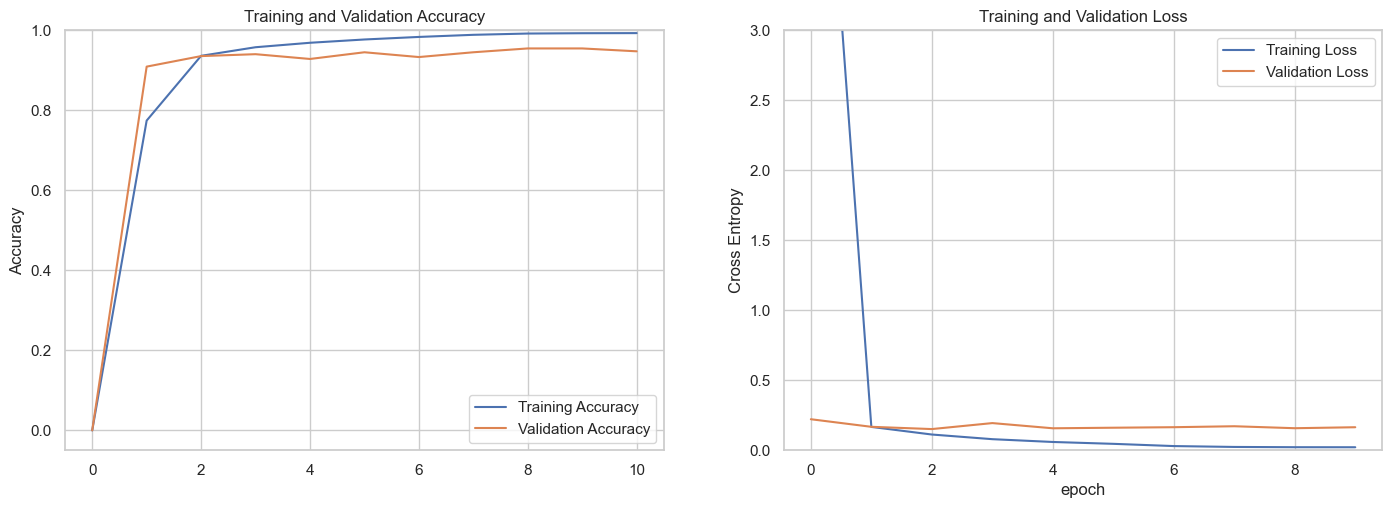

In [96]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()